# Part 1) A linear programming approach for optimizing features in ML models

Read the article [A linear programming approach for optimizing features in ML models](https://engineering.fb.com/2021/07/29/data-infrastructure/linear-programming/).

Summarise it technically in about **400 words**, ensuring you capture the Mathematical formulation of how Linear Programming is used. (Do not discuss the code.)

- Use LaTeX for the mathematical formulae, not images. You also need to expand on the formulae given in the article.


The article talks about using Integer Linear Programming (ILP), a kind of Linear Programming (LP), as a strong and bendy way to choose features in machine learning. This way seeks to get the best set of features that boosts how well a model works, keeping in mind real-life limits, like how many features we can have or how much they cost. It offers a clear option compared to heuristic methods like recursive feature elimination or regularization techniques like LASSO.

The main thing of this way is to turn the feature picking problem into a mathematical optimization problem . This can be acheived through the following expression:

**Mathematical Formulation**



**1. Decision  Variable**



For finding out the every possible feature in the dataset , a binary decision variable , xi is constructed





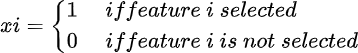


The optimization problem is based on these variables





**2. Objective Function**


Maximizing a linear proxy for model performance is the aim . Usually, to obtained this, each feature is given an importance source , ci. Simpler models (like Random Forest feature importance), statistical tests (like F-scores), or information theory metrics (like mutual information) can all be used to calculate this score. The objective function is then used to maximize the total of the chosen features importance scores:



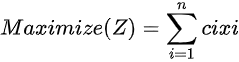


In this case, n is the total number of features that are accessible.


**3. Constraints**

The LP approach's primary benefit is its capacity to manage a wide range of intricate constraints in a linear format.

**Maximum Number of Features:**








 To manage model complexity and avoid overfitting, it is common practice to restrict the total number of features that are chosen to a value K.

 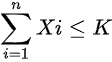

**Cost or Resource Constraint:**

 A budget B can set a limit on the overall cost if each feature has a corresponding cost (for example, for data acquisition or computation).


 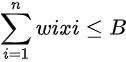


   **Feature Dependencies:**

 Logical connections between features can be modeled by the framework.

**Prerequisite:**

The constraint is as follows if choosing feature j necessitates choosing feature k as well (for example, if k is a raw variable and j is derived from it):

image.png
















**Mutual Exclusion:**


 The constraint is as follows if features j and k are perfectly collinear, meaning they cannot be chosen together:

image.png

The combination of features that is provably optimal for the specified linear objective and constraints can be found by solving this ILP problem, offering a potent tool for creating machine learning models that are more effective and understandable.



A farmer has 500 acres of land to allocate to wheat, corn, and sugar beets.

The following table summarises the requirements and constraints:

|                          | Unit    | Wheat | Corn | Sugar Beets |
|--------------------------|---------|------:|-----:|:-----------:|
| Yield                    | T/acre  | 2.5   | 3    | 20          |
| Demand (Need for feed)   | T       | 200   | 240  |             |
| Planting cost            | £/acre  | 150   | 230  | 260         |
| Selling price            | £/T     | 170   | 150  | 36 if produce ≤ 6000 T |
|                          | £/T     |       |      | 10 if produce > 6000 T |
| Backup (Purchase price)  | £/T     | 238   | 210  |             |

|Variable name| Description |
|:------------|:-----|
|$x_1$| Acres of land used for wheat |
|$x_2$| Acres of land used for corn |
|$x_3$| Acres of land used for sugar beets |
|$p_1$| Tons of crop wheat sold |
|$p_2$| Tons of crop corn sold |
|$p_3$| Tons of crop sugar beets sold at £36 |
|$p_4$| Tons of crop sugar beets sold at £10 |
|$y_1$| Tons of wheat purchased |
|$y_2$| Tons of corn purchased |


Profit formula:

$$
.........................
$$

Constraints:

$$
\begin{alignat*}{4}
    ......................... &\leq ...... \\
    ......................... &\leq ...... \\
    ......................... \\
    ......................... & \geq 0
\end{alignat*}
$$

 x_w= Land in acres for wheat

 x_c= Land in acres for corn

 x_sb= Land in acres for sugar beets

  y_w= Wheat sold in tons

  y_c =Corn sold in tons

  y_sb1= Sugar beets sold at £36 in tons

  y_sb2 =Sugar beets sold at £10 in tons

  b_w= Wheat bought in tons
  
  b_c= Corn bought, in tons

**Profit Formula :**

 The aim is to get the most total profit, which is the money from sales take away the costs of growing and buying crops.

 Maximize Profit =(170y_
w
​
 +150y_
c
​
 +36y_
sb1
​
 +10y_
sb2
​
 )−(150x _
w
​
 +230x _
c
​
 +260x _
sb
​
 +238b _
w
​
 +210b _
c
​
 )





**Constraints :**

**1. Land Constarint:** The total land used can't be over 500 acres.

x _
w
​
 +x _
c
​
 +x _
sb
​
 ≤500





**2. Crop Balance Constraints:** For wheat and corn, the amount made plus the amount bought must be the same as the amount sold plus the amount used for feed. Wheat: 2.5x_
w
​
 +b _
w
​
 =y_
w
​
 +200



Corn: 3x_
c
​
 +b_
c
​
 =y _
c
​
 +240




 **3. Sugar Beet Production Constraint**

  The total sugar beets sold must match the amount made.

  y_
sb1
​
 +y _
sb2
​
 =20x_
sb
​



**4. Sugar Beet Sales Tier Constraint:**At most, 6000 tons of sugar beets can sell at the high price.

y _
sb1
​
 ≤6000


 **5.Non-negativity:**All the numbers we use must not be less than zero.


x _
w
​
 ,x _
c
​
 ,x _
sb
​
 ,y _
w
​
 ,y _
c
​
 ,y _
sb1
​
 ,y _
sb2
​
 ,b_
w
​
 ,b_
c
​
  ≥0



## Solution using PuLP

from pulp import *


### Optimal solution

|Category |Unit|Wheat|Corn|Sugar Beets|
|---------|----|-----|----|-----------|
|Area     |Acre|     |    |           |
|Yield    |T   |     |    |           |
|Sales    |T   |     |    |           |
|Purchase |T   |     |    |           |

Total cost: ...............

In [ ]:
# Installing the PuLP library for linear programming
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 22.6 MB/s eta 0:00:00


The  Python code can be used to define and resolve the farmer's problem after installation. The previously given mathematical formulation is directly implemented .



In [ ]:
# Importing the PuLP library
from pulp import *

# 1. Setupping the Model
# Making an LP maximization problem.
prob = LpProblem("Farmer_Problem", LpMaximize)

# 2. Establishing Decision Variable (Decision)
# Planting Acres
x_w = LpVariable("Acres_Wheat", 0, None, LpContinuous)
x_c = LpVariable("Acres_Corn", 0, None, LpContinuous)
x_sb = LpVariable("Acres_SugarBeets", 0, None, LpContinuous)

# Tons to sell
y_w = LpVariable("Sold_Wheat", 0, None, LpContinuous)
y_c = LpVariable("Sold_Corn", 0, None, LpContinuous)
y_sb1 = LpVariable("Sold_SugarBeets_Tier1", 0, None, LpContinuous) # High price
y_sb2 = LpVariable("Sold_SugarBeets_Tier2", 0, None, LpContinuous) # Low price

# Tons to purchase
b_w = LpVariable("Purchased_Wheat", 0, None, LpContinuous)
b_c = LpVariable("Purchased_Corn", 0, None, LpContinuous)

# 3. Defining the Objective Function (Profit)
# Sales Revenue-(Purchase+Planting Costs)
prob += (170*y_w + 150*y_c + 36*y_sb1 + 10*y_sb2) - \
        (150*x_w + 230*x_c + 260*x_sb + 238*b_w + 210*b_c), "Total_Profit"

# 4. Defining the Constraints
# Land constraint: Total acres must be <= 500 (The total number of acres must not exceed 500.)
prob += x_w + x_c + x_sb <= 500, "Total_Land_Constraint"

# Constraints of balance: (Yield + Purchase) = (Sold + Feed)
prob += 2.5*x_w + b_w == y_w + 200, "Wheat_Balance"
prob += 3*x_c + b_c == y_c + 240, "Corn_Balance"

# Sugar beet constraints
prob += y_sb1 + y_sb2 == 20*x_sb, "SugarBeet_Production" # All produced beets are sold
prob += y_sb1 <= 6000, "SugarBeet_Tier1_Limit" # Max sales at high price

# 5. Solving the Problem
prob.solve()


print("-" * 30)
print("Calculated Optimal Yields:")

# Calculate and print yield for each crop
print(f"Wheat Yield: {x_w.varValue * 2.5:.2f} Tons")
print(f"Corn Yield: {x_c.varValue * 3:.2f} Tons")
print(f"Sugar Beet Yield: {x_sb.varValue * 20:.2f} Tons")



# 6. Printing the Results
print(f"Solver Status: {LpStatus[prob.status]} ")
print("-" * 30)
print("Optimal Solution (Allocation & Transactions):")
for v in prob.variables():
    print(f"{v.name} = {v.varValue:.2f}")

print("-" * 30)
#  Two decimal places are added to the final objective value.
print(f"Maximum Profit = £{value(prob.objective):,.2f}")



# Calculating total cost using the optimal values from the solved problem
total_cost = (150 * x_w.varValue) + \
             (230 * x_c.varValue) + \
             (260 * x_sb.varValue) + \
             (238 * b_w.varValue) + \
             (210 * b_c.varValue)

# Print the calculated total cost
print("-" * 30)
print(f"Total Cost = £{total_cost:,.2f}")

------------------------------
Calculated Optimal Yields:
Wheat Yield: 300.00 Tons
Corn Yield: 240.00 Tons
Sugar Beet Yield: 6000.00 Tons
Solver Status: Optimal 
------------------------------
Optimal Solution (Allocation & Transactions):
Acres_Corn = 80.00
Acres_SugarBeets = 300.00
Acres_Wheat = 120.00
Purchased_Corn = 0.00
Purchased_Wheat = 0.00
Sold_Corn = 0.00
Sold_SugarBeets_Tier1 = 6000.00
Sold_SugarBeets_Tier2 = 0.00
Sold_Wheat = 100.00
------------------------------
Maximum Profit = £118,600.00
------------------------------
Total Cost = £114,400.00


## References

###  Feature Selection
1.  Srinivasan, S., & Kamal, A. (2021, July 29). *A linear programming approach for optimizing features in ML models*. Meta Engineering. Retrieved from [https://engineering.fb.com/2021/07/29/data-infrastructure/linear-programming/](https://engineering.fb.com/2021/07/29/data-infrastructure/linear-programming/)
2.  Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. *Journal of Machine Learning Research*, 3, 1157-1182.
3.  Mera, C. G., & Gámez, J. A. (2021). Feature Selection for Tabular Data via Integer Linear Programming. In *Proceedings of the AAAI Conference on Artificial Intelligence* (Vol. 35, No. 10, pp. 8891-8899).
4.  Bertsimas, D., & Dunn, J. (2017). Optimal classification trees. *Machine Learning*, 106(7), 1039-1082.

###  The Farmer's Problem
1.  Hillier, F. S., & Lieberman, G. J. (2015). *Introduction to Operations Research* (10th ed.). McGraw-Hill.
2.  Winston, W. L. (2004). *Operations Research: Applications and Algorithms* (4th ed.). Duxbury Press.
3.  Hazell, P. B. R., & Norton, R. D. (1986). *Mathematical Programming for Economic Analysis in Agriculture*. Macmillan.